In [5]:
import time
import glob
import os

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.models import load_model
from keras.callbacks import ModelCheckpoint


import keras.backend as K
from easydl import clear_output
from sklearn.utils import shuffle

# from get_representations import *


In [6]:
# 验证实验结果
m = load_model('/data/drink/e_result/3456/val=12&test=34&320-160-32-2-001-145.22.h5')
clear_output()

In [7]:
# 数据读取
base_path = '/data/drink/experiment/3456'
ECG_test = np.load(os.path.join(base_path,'ECG_test.npy'))
LABEL_test = np.load(os.path.join(base_path,'LABEL_test.npy'))

In [9]:
res = m.predict(ECG_test)
print(res[0])
# print(test_label[0])
print(res.shape)

[136.07944  80.132  ]
(5207, 2)


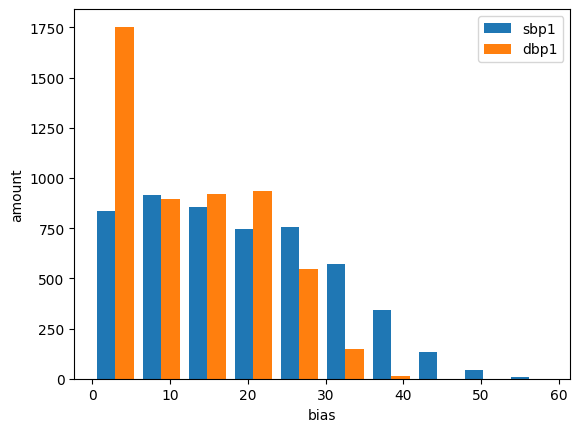

In [11]:
differ = abs(res-LABEL_test)
plt.hist(differ,label=['sbp1','dbp1','sbp2','dbp2'])
plt.xlabel('bias')
plt.ylabel('amount')
plt.legend()

clear_output()

In [12]:
# 数数
def BHS_standard(predict, test):
    total = len(predict)
    mm5 = np.sum(np.abs(predict-test)<=5.0)
    mm10 = np.sum(np.abs(predict-test)<=10.0)
    mm15 = np.sum(np.abs(predict-test)<=15.0)
    return total, mm5, mm10, mm15


In [15]:
t_data = tf.transpose(LABEL_test,(1,0))
predict_data = tf.transpose(res,(1,0))
predict_data.dtype # 检查数据类型，发现predict是float32，label是float64
predict_data = tf.cast(predict_data,dtype='float64') 

total, mm5, mm10, mm15 = BHS_standard(t_data[0],predict_data[0])

In [16]:
print()
print('-------------BHS standard------------')
print('<5mmHg        <10mmHg        <15mmHg        total')
print('%d            %d           %d          %d' % (mm5,mm10,mm15,total))
print('%.3f%s        %.3f%s       %.3f%s         %d' % (mm5/total*100, '%',mm10/total*100, '%',mm15/total*100, '%', total))


-------------BHS standard------------
<5mmHg        <10mmHg        <15mmHg        total
699            1472           2244          5207
13.424%        28.270%       43.096%         5207
